In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
date = '02122020-1505'

projectionData = None
projectionData = pd.read_csv('../Assets/Resources/DataSimulation/Distances/' + date + 'FingerTip.csv', sep = ";", decimal = '.')
projectionData = projectionData.dropna()

In [16]:
projectionData.head()

Time  Config  NbBloc  BoneID                         Name  Position  \
0  3.752484       5       0       4  Hand_Thumb1_CapsuleCollider    0.0495   
1  5.036693       5       0       4  Hand_Thumb1_CapsuleCollider    0.0495   
2  5.101872       5       0       4  Hand_Thumb1_CapsuleCollider    0.0610   
3  5.135051       5       0       4  Hand_Thumb1_CapsuleCollider    0.0664   
4  5.163043       5       0       4  Hand_Thumb1_CapsuleCollider    0.0664   

   ThumbTarget                  ProjThumb  ErrorThumb  ClosestPosition  ...  \
0       0.7404  (0.1681, -0.0896, 0.1310)      0.7034           0.7099  ...   
1       0.7404  (0.1681, -0.0896, 0.1310)      0.7034           0.7099  ...   
2       0.7404  (0.1630, -0.5196, 0.0384)      0.5002           0.7133  ...   
3       0.7404  (0.1228, -0.5561, 0.0166)      0.4729           0.7126  ...   
4       0.7404  (0.1228, -0.5561, 0.0166)      0.4729           0.7107  ...   

   ErrorClosest.13  BoneID.14                      Name.14 Position.14  \
0           0.0000         18  Hand_Pinky3_CapsuleCollider      0.1372   
1           0.6746         18  Hand_Pinky3_CapsuleCollider      0.1372   
2           0.7060         18  Hand_Pinky3_CapsuleCollider      0.1343   
3           0.7108         18  Hand_Pinky3_CapsuleCollider      0.1345   
4           0.7036         18  Hand_Pinky3_CapsuleCollider      0.1345   

   ThumbIndex.10               ProjIndex.10 ErrorIndex.10  ClosestPosition.14  \
0         0.7727  (-0.2456, 0.0407, 0.0951)        0.7253              0.7099   
1         0.7727  (-0.2456, 0.0407, 0.0951)        0.7253              0.7099   
2         0.7727  (-0.1812, 0.0602, 0.1127)        0.7402              0.7133   
3         0.7727  (-0.1486, 0.0602, 0.0966)        0.7497              0.7126   
4         0.7727  (-0.1486, 0.0602, 0.0966)        0.7497              0.7107   

   ProjClosest.14  ErrorClosest.14  
0          0.2211           0.6746  
1          0.2211           0.6746  
2          0.1677           0.6933  
3          0.1355           0.6996  
4          0.1386           0.6970  

[5 rows x 138 columns]

### Configurations:
* 0: grasp from the sides, small object;
* 1: grasp from the top, small object;
* 2: grasp from the sides, medium object;
* 3: grasp from the top, medium object;
* 4: grasp from the sides, large object;
* 5: grasp from the top, large object.

In [17]:
config0 = None
config0 = pd.DataFrame()
config0 = projectionData[projectionData['Config'] == 0]

config1 = None
config1 = pd.DataFrame()
config1 = projectionData[projectionData['Config'] == 1]

config2 = None
config2 = pd.DataFrame()
config2 = projectionData[projectionData['Config'] == 2]

config3 = None
config3 = pd.DataFrame()
config3 = projectionData[projectionData['Config'] == 3]

config4 = None
config4 = pd.DataFrame()
config4 = projectionData[projectionData['Config'] == 4]

config5 = None
config5 = pd.DataFrame()
config5 = projectionData[projectionData['Config'] == 5]

In [18]:
projectionData

Time  Config  NbBloc  BoneID                         Name  \
0        3.752484       5       0       4  Hand_Thumb1_CapsuleCollider   
1        5.036693       5       0       4  Hand_Thumb1_CapsuleCollider   
2        5.101872       5       0       4  Hand_Thumb1_CapsuleCollider   
3        5.135051       5       0       4  Hand_Thumb1_CapsuleCollider   
4        5.163043       5       0       4  Hand_Thumb1_CapsuleCollider   
5        5.191203       5       0       4  Hand_Thumb1_CapsuleCollider   
6        5.218979       5       0       4  Hand_Thumb1_CapsuleCollider   
7        5.247053       5       0       4  Hand_Thumb1_CapsuleCollider   
8        5.275054       5       0       4  Hand_Thumb1_CapsuleCollider   
9        5.303048       5       0       4  Hand_Thumb1_CapsuleCollider   
10       5.331234       5       0       4  Hand_Thumb1_CapsuleCollider   
11       5.359131       5       0       4  Hand_Thumb1_CapsuleCollider   
12       5.386894       5       0       4  Hand_Thumb1_CapsuleCollider   
13       5.415100       5       0       4  Hand_Thumb1_CapsuleCollider   
14       5.443081       5       0       4  Hand_Thumb1_CapsuleCollider   
15       5.470903       5       0       4  Hand_Thumb1_CapsuleCollider   
16       5.499078       5       0       4  Hand_Thumb1_CapsuleCollider   
17       5.527153       5       0       4  Hand_Thumb1_CapsuleCollider   
18       5.555021       5       0       4  Hand_Thumb1_CapsuleCollider   
19       5.583166       5       0       4  Hand_Thumb1_CapsuleCollider   
20       5.610929       5       0       4  Hand_Thumb1_CapsuleCollider   
21       5.634829       5       0       4  Hand_Thumb1_CapsuleCollider   
22       5.658943       5       0       4  Hand_Thumb1_CapsuleCollider   
23       5.687239       5       0       4  Hand_Thumb1_CapsuleCollider   
24       5.715330       5       0       4  Hand_Thumb1_CapsuleCollider   
25       5.747104       5       0       4  Hand_Thumb1_CapsuleCollider   
26       5.783337       5       0       4  Hand_Thumb1_CapsuleCollider   
27       5.815104       5       0       4  Hand_Thumb1_CapsuleCollider   
28       5.843189       5       0       4  Hand_Thumb1_CapsuleCollider   
29       5.871126       5       0       4  Hand_Thumb1_CapsuleCollider   
...           ...     ...     ...     ...                          ...   
16779  500.279100       0       3       4  Hand_Thumb1_CapsuleCollider   
16780  500.307000       0       3       4  Hand_Thumb1_CapsuleCollider   
16781  500.335100       0       3       4  Hand_Thumb1_CapsuleCollider   
16782  500.363300       0       3       4  Hand_Thumb1_CapsuleCollider   
16783  500.395300       0       3       4  Hand_Thumb1_CapsuleCollider   
16784  500.423100       0       3       4  Hand_Thumb1_CapsuleCollider   
16785  500.451000       0       3       4  Hand_Thumb1_CapsuleCollider   
16786  500.487300       0       3       4  Hand_Thumb1_CapsuleCollider   
16787  500.515400       0       3       4  Hand_Thumb1_CapsuleCollider   
16788  500.543200       0       3       4  Hand_Thumb1_CapsuleCollider   
16789  500.571200       0       3       4  Hand_Thumb1_CapsuleCollider   
16790  500.599000       0       3       4  Hand_Thumb1_CapsuleCollider   
16791  500.627000       0       3       4  Hand_Thumb1_CapsuleCollider   
16792  500.654900       0       3       4  Hand_Thumb1_CapsuleCollider   
16793  500.683300       0       3       4  Hand_Thumb1_CapsuleCollider   
16794  500.710800       0       3       4  Hand_Thumb1_CapsuleCollider   
16795  500.739300       0       3       4  Hand_Thumb1_CapsuleCollider   
16796  500.767000       0       3       4  Hand_Thumb1_CapsuleCollider   
16797  500.795000       0       3       4  Hand_Thumb1_CapsuleCollider   
16798  500.823000       0       3       4  Hand_Thumb1_CapsuleCollider   
16799  500.851400       0       3       4  Hand_Thumb1_CapsuleCollider   
16800  500.879200       0       3       4  Hand_Thumb1_CapsuleCollider   
16801  500.906900

(0, 25)

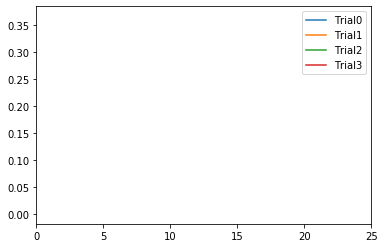

In [19]:
cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time'][1:], projectionData[cond0]['ErrorThumb.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)


In [20]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorThumb.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorThumb.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorThumb.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorThumb.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

KeyError: 'Time0'

(0, 25)

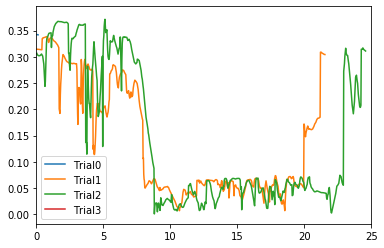

In [160]:
cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

(0, 25)

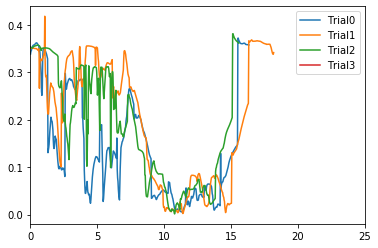

In [161]:
cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

plt.plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.2'][1:], label ="Trial0")
plt.plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.2'][1:], label ="Trial1")
plt.plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.2'][1:], label = "Trial2")
plt.plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.2'][1:], label = "Trial3")
plt.legend()
plt.xlim(0, 25)

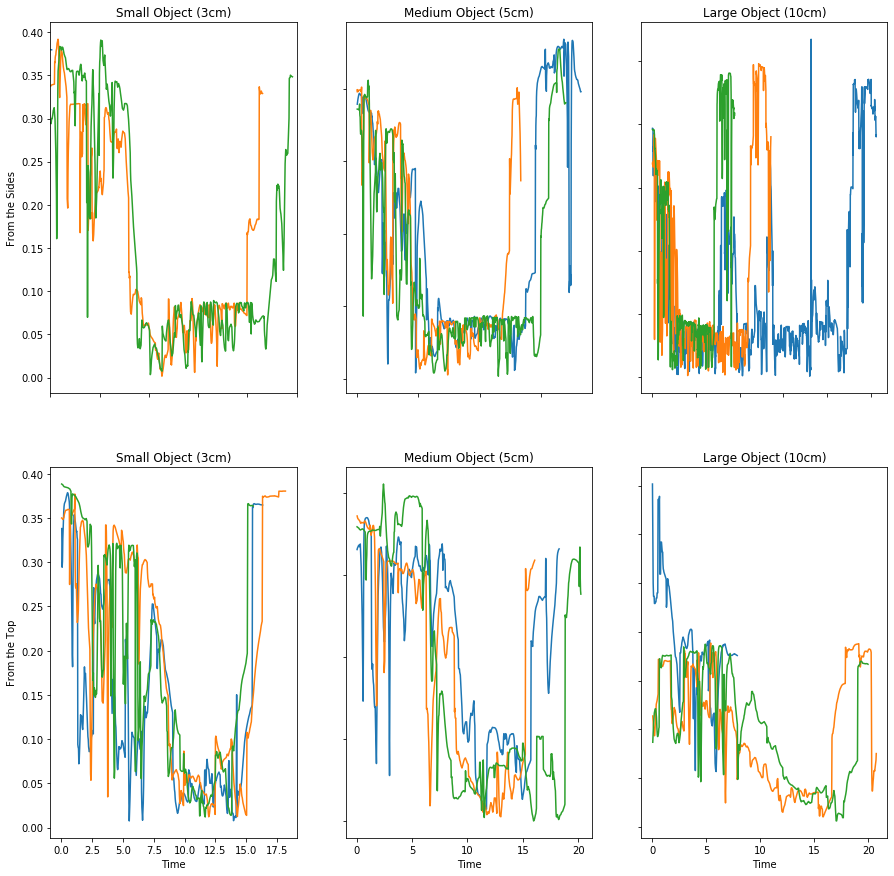

In [236]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 0
column = 'ErrorThumb'
condition = '_Thumb_1stPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

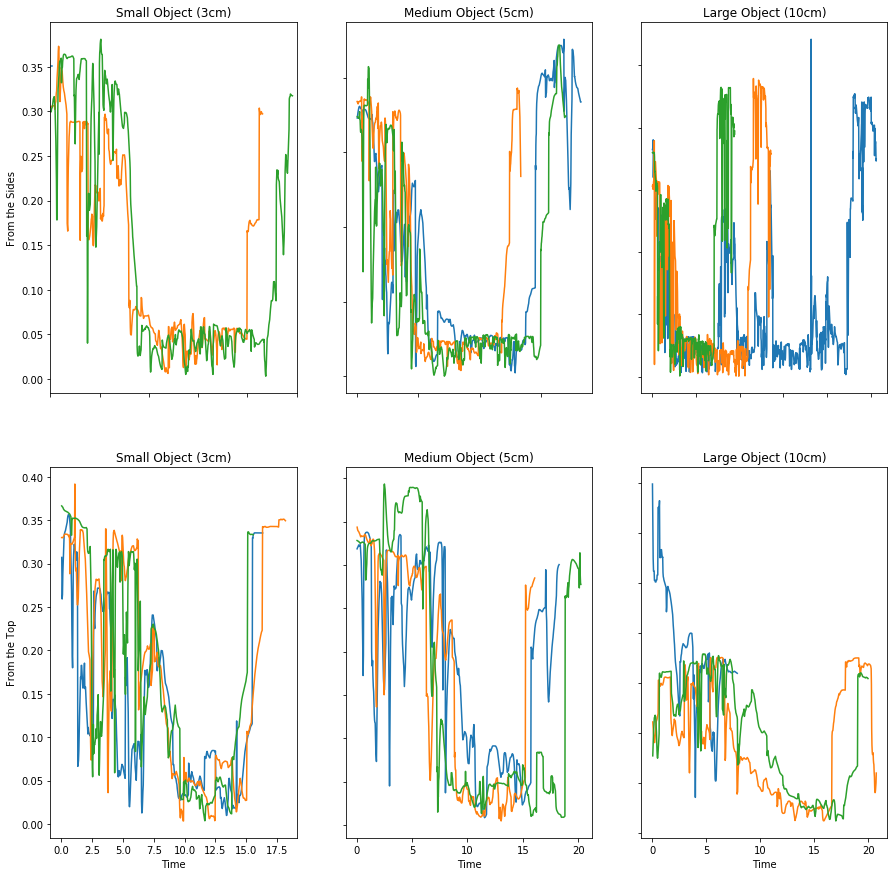

In [235]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 1
column = 'ErrorThumb.'
condition = '_Thumb_2ndPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

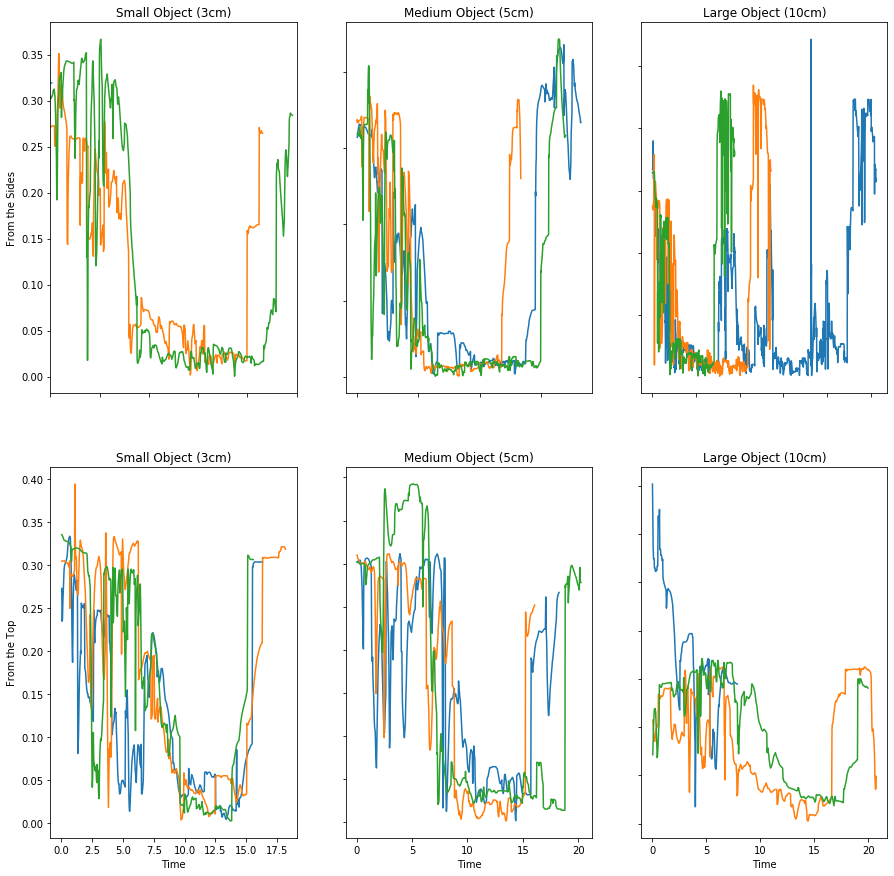

In [234]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 2
column = 'ErrorThumb.'
condition = '_Thumb_FingerTip'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

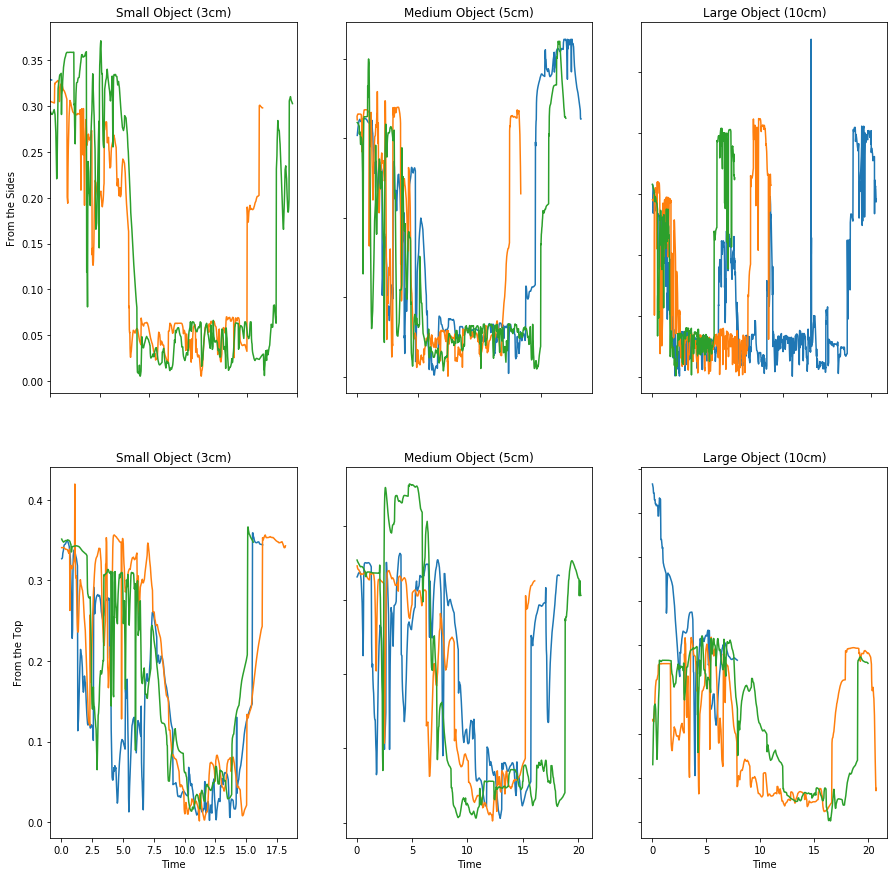

In [233]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 3
column = 'ErrorThumb.'
condition = '_Index_1stPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0][column + str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1][column + str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2][column + str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3][column + str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

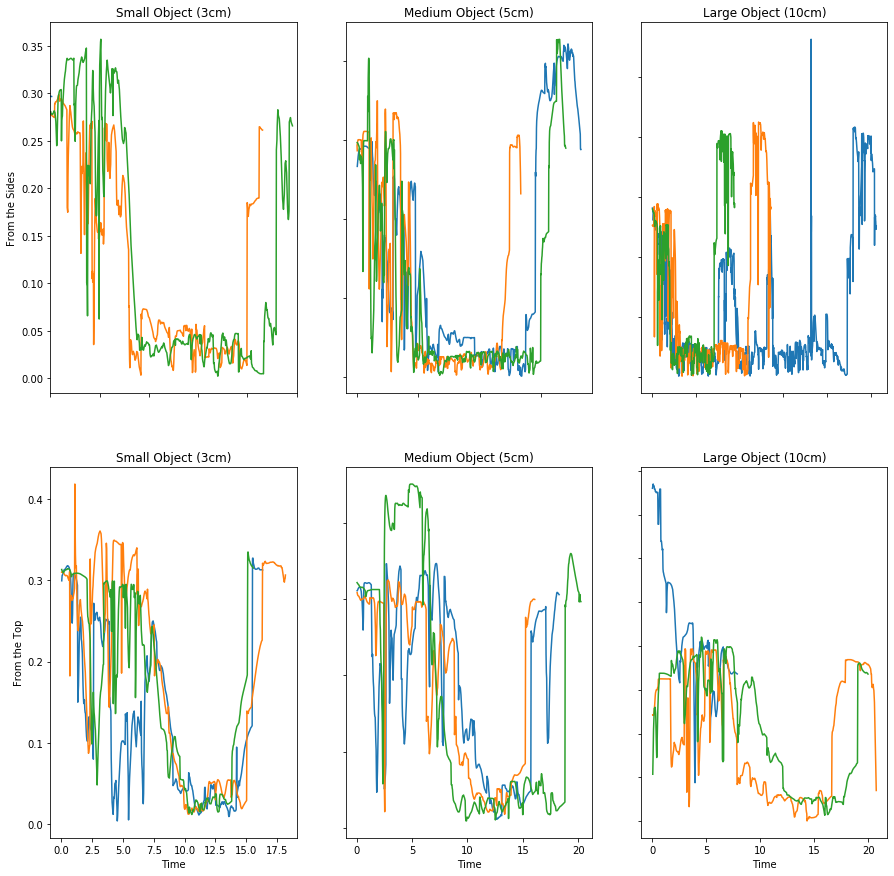

In [232]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

condition = '_Index_2ndPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex'][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex'][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex'][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex'][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

    
fig.savefig('./ErrorPosition' + condition +'.png')

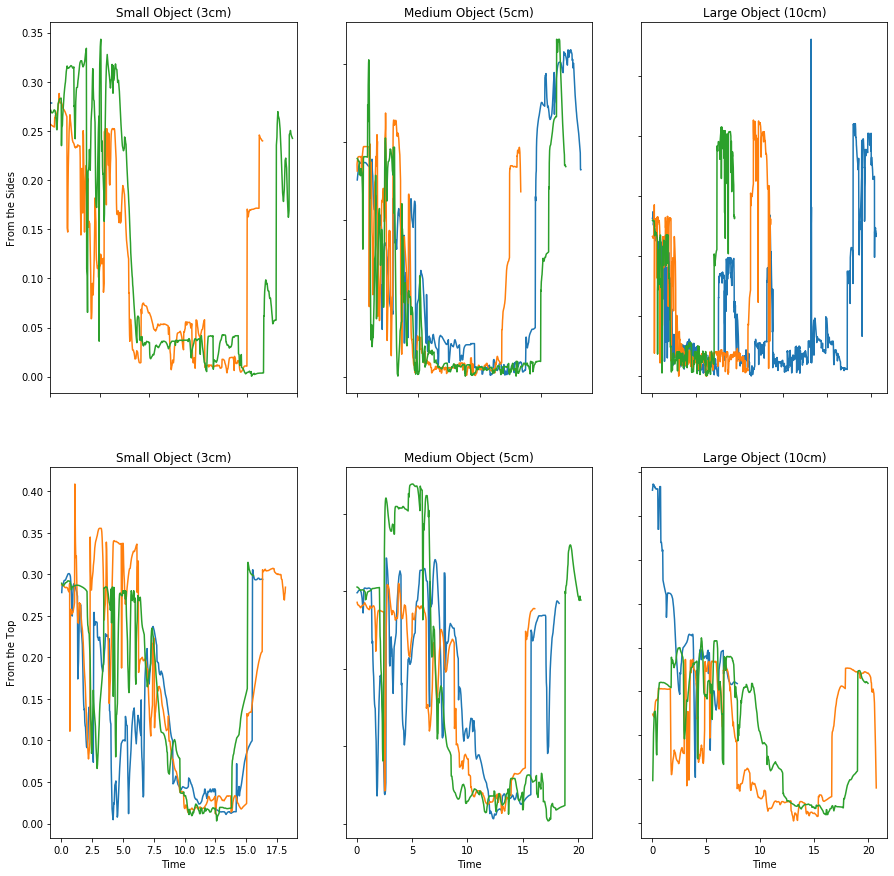

In [231]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 1
condition = '_Index_Fingertip'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

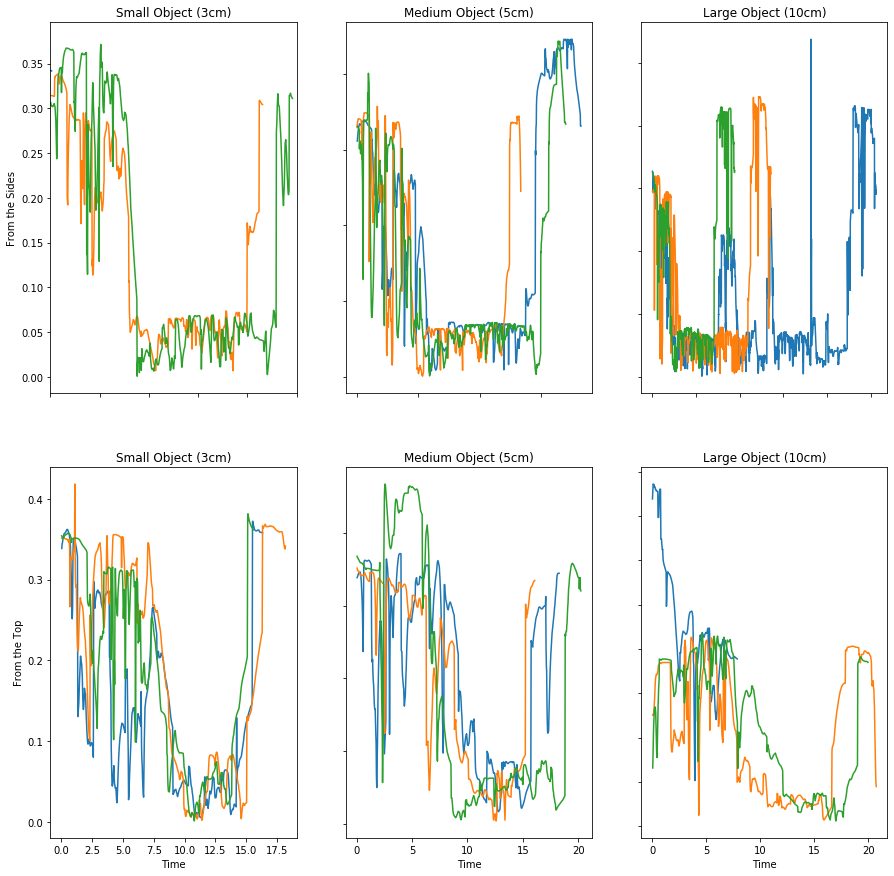

In [227]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 2
condition = '_Middle_1stPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

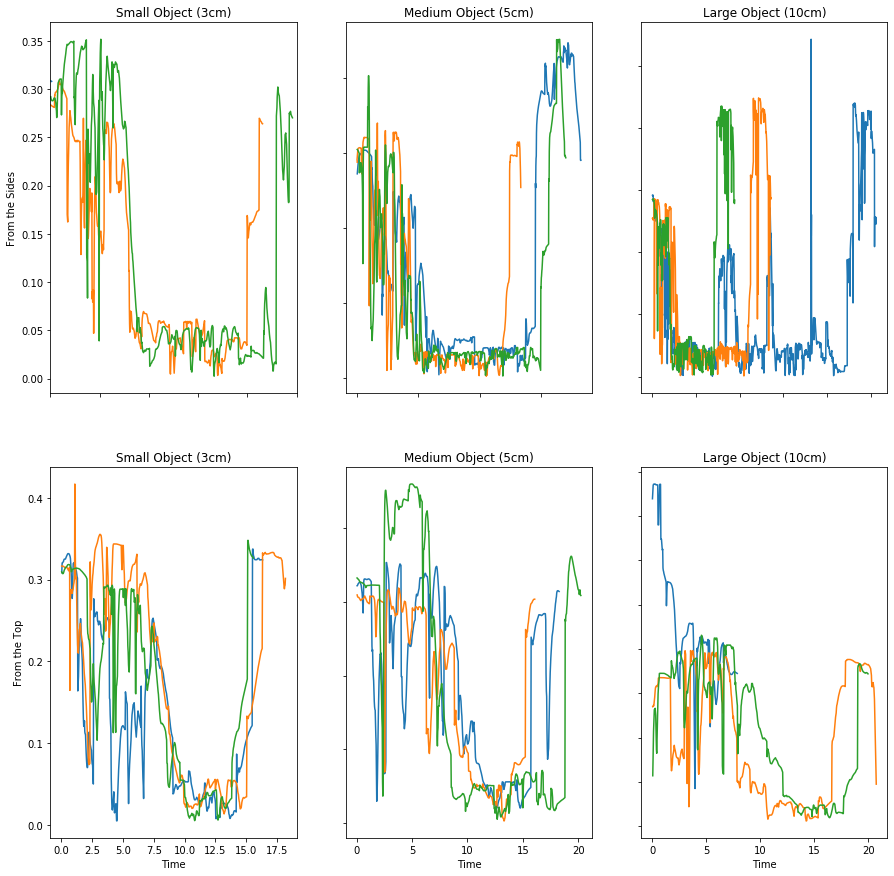

In [226]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 3
condition = '_Middle_2ndPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

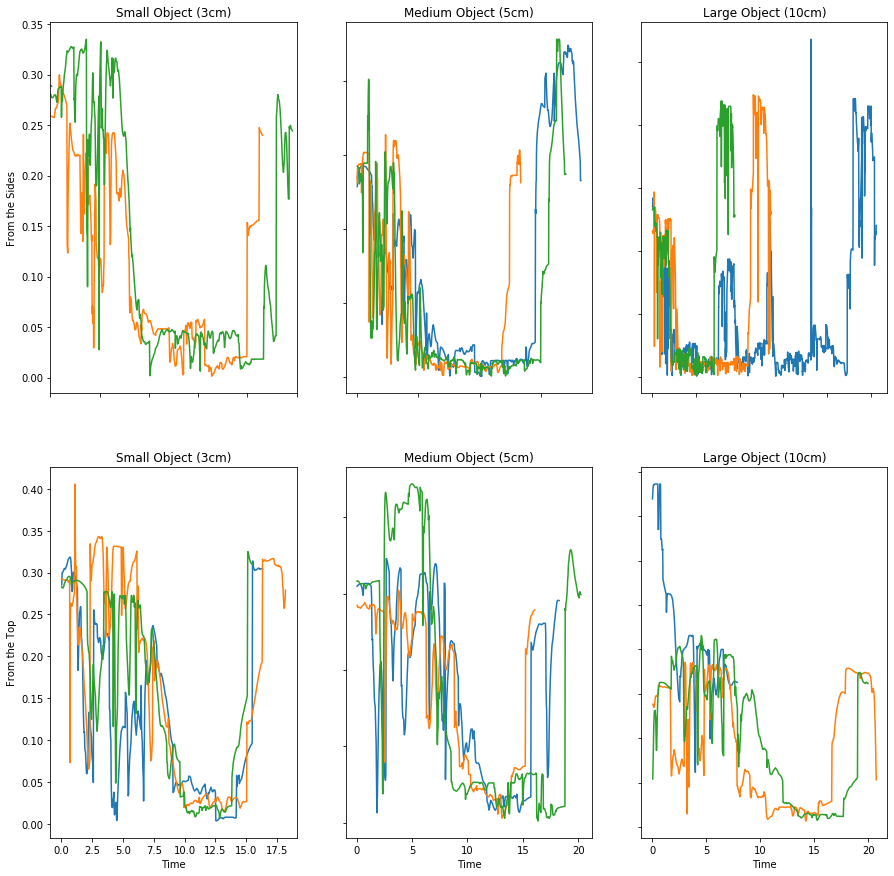

In [224]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 4
condition = '_Middle_FingerTip'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

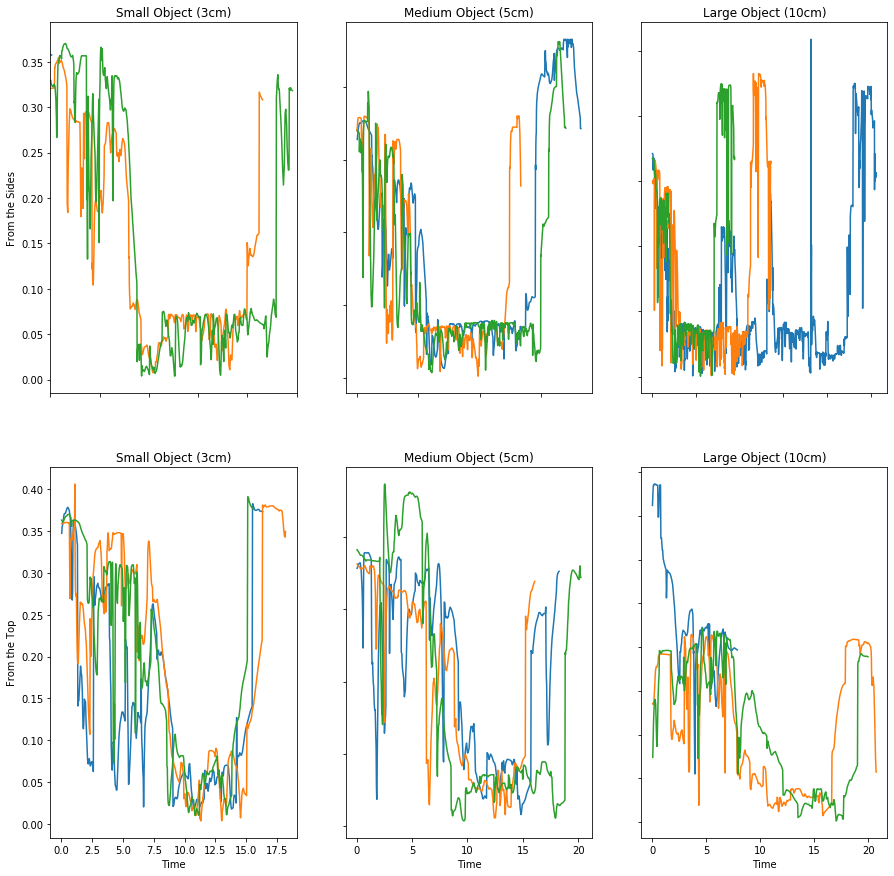

In [223]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 5
condition = '_Ring_1stPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

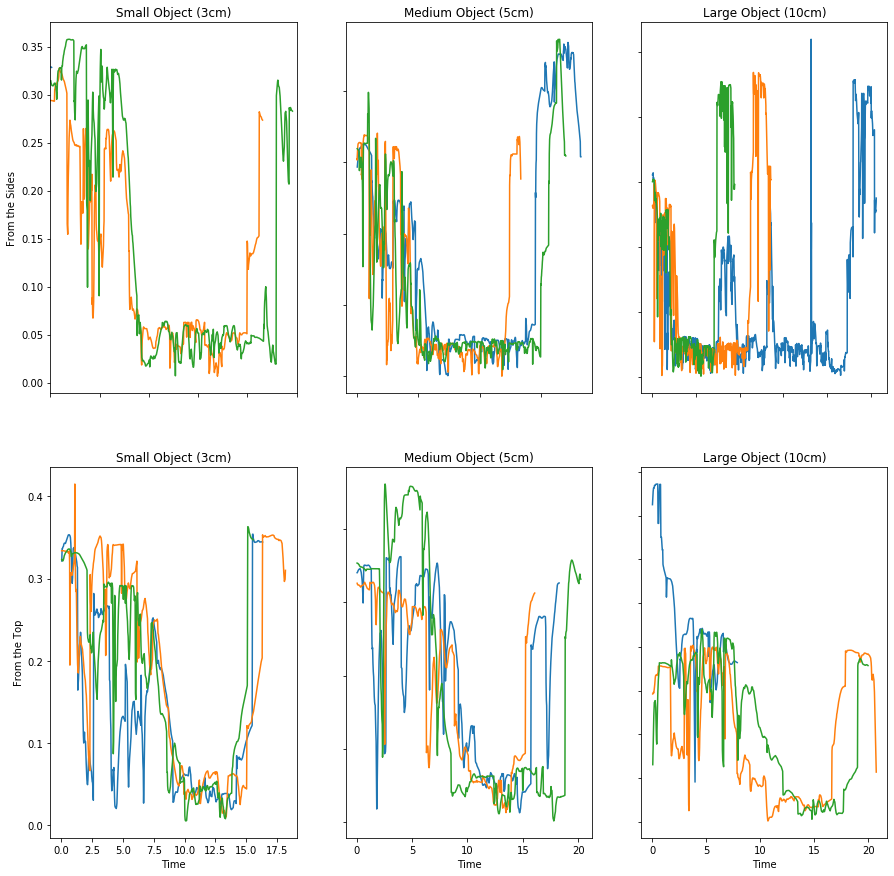

In [222]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 6
condition = '_Ring_2ndPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

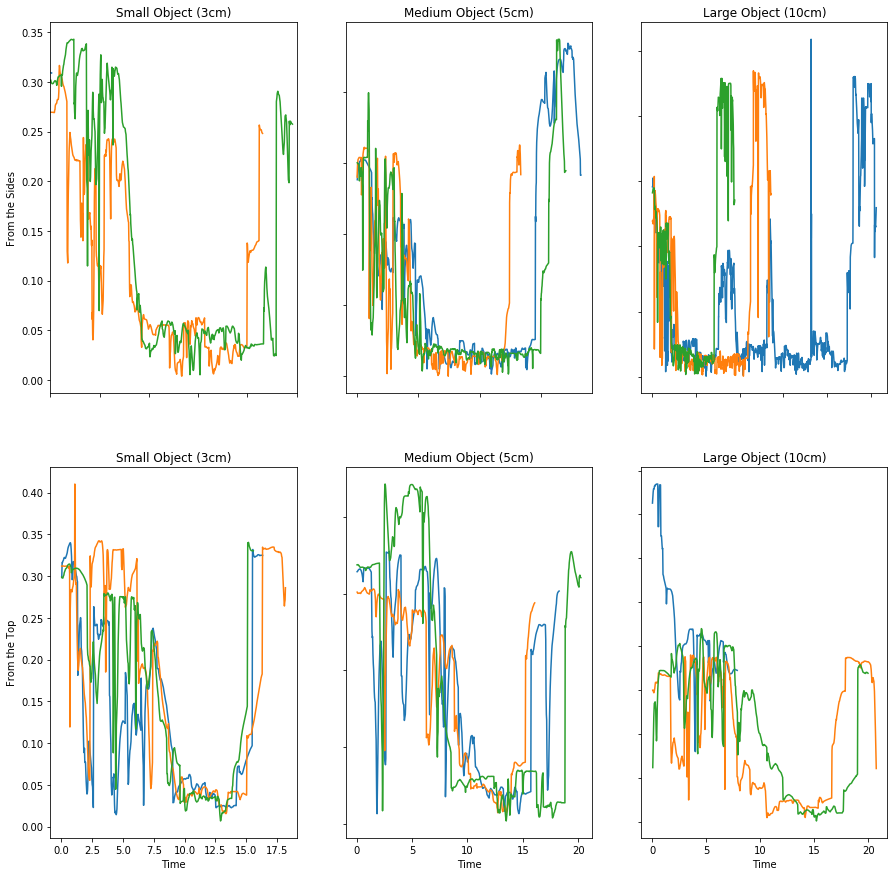

In [221]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 7
condition = '_Ring_FingerTip'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

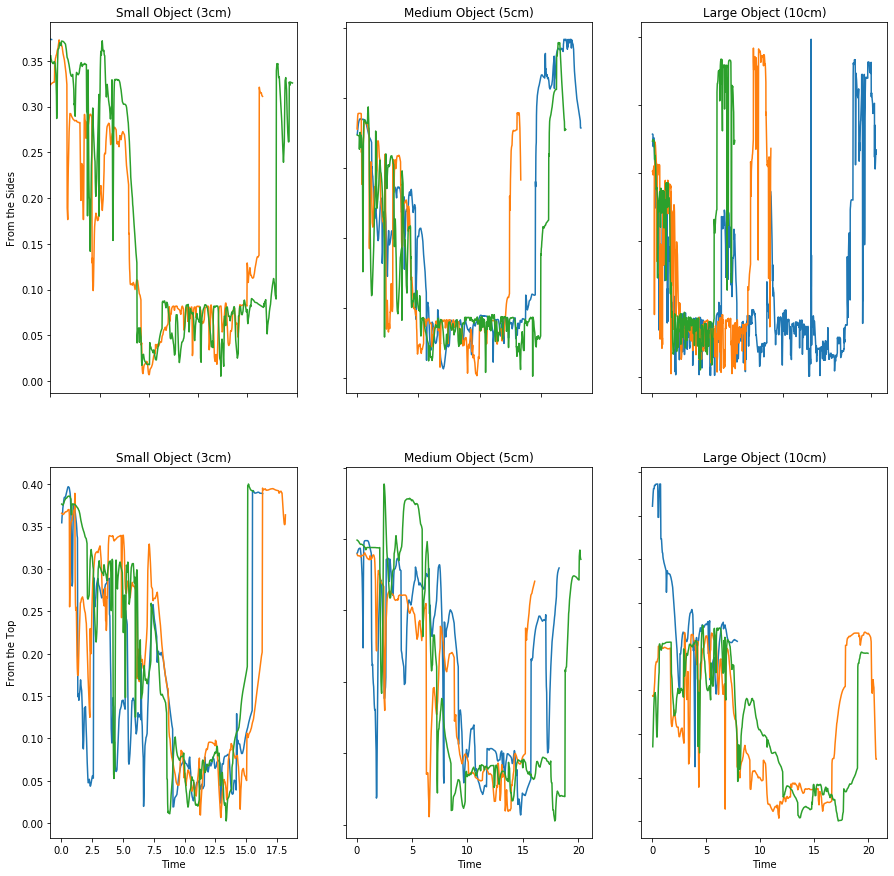

In [220]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 8
condition = '_Pinky_1stPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

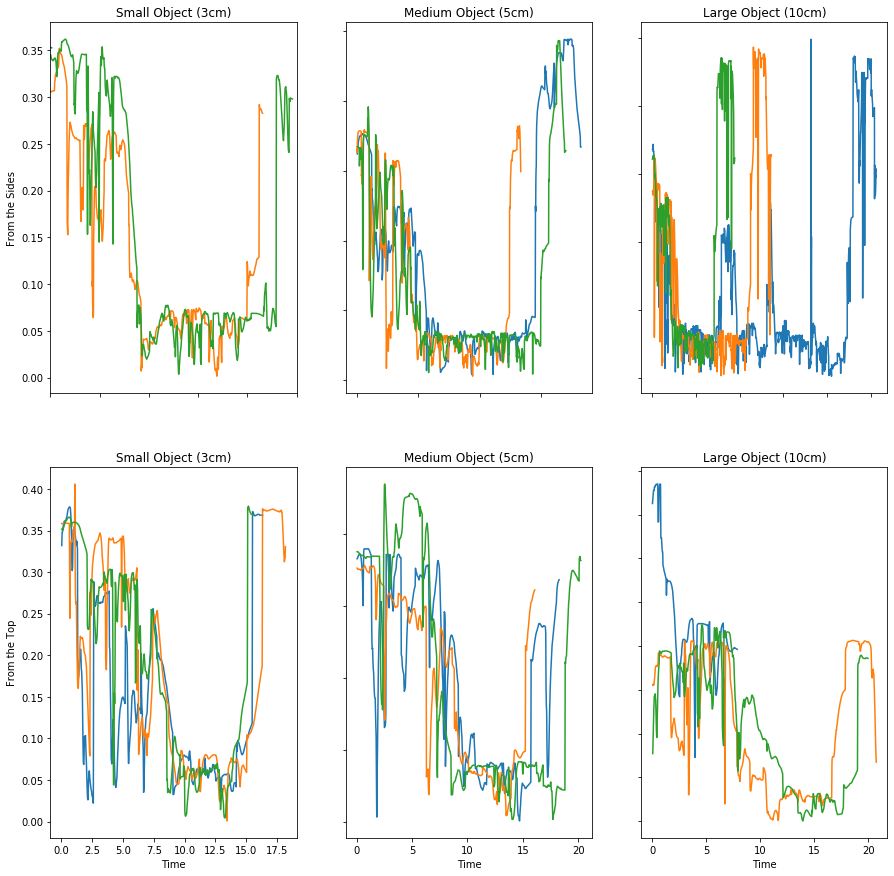

In [219]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 9
condition = '_Pinky_2ndPhalanx'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')

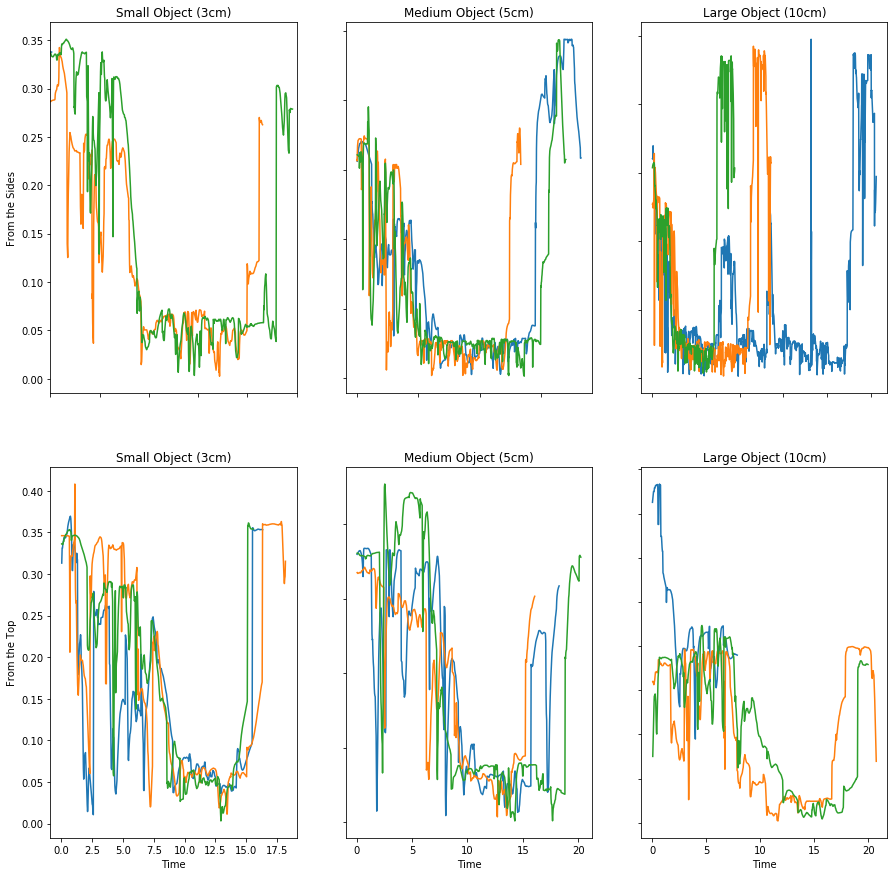

In [218]:
fig, axs = plt.subplots(2, 3, figsize = (15, 15))

i = 10
condition = '_Pinky_Fingertip'

cond0 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 0) & (projectionData['NbBloc'] == 3)

axs[0, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
axs[0,0].set_xlim(0, 25)
axs[0, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 2) & (projectionData['NbBloc'] == 3)

axs[0, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Sides')

axs[0, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 1) & (projectionData['NbBloc'] == 3)

axs[1, 0].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 0].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 0].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 0].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")
#ax.set(ylabel = 'Grasp From the Top')

axs[1, 0].set_title('Small Object (3cm)')

cond0 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 3) & (projectionData['NbBloc'] == 3)

axs[1, 1].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 1].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 1].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 1].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 1].set_title('Medium Object (5cm)')

cond0 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 4) & (projectionData['NbBloc'] == 3)

axs[0, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[0, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[0, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[0, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[0, 2].set_title('Large Object (10cm)')

cond0 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 0)
cond1 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 1)
cond2 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 2)
cond3 = (projectionData['Config'] == 5) & (projectionData['NbBloc'] == 3)

axs[1, 2].plot(projectionData[cond0]['Time0'][1:], projectionData[cond0]['ErrorIndex.'+ str(i)][1:], label ="Trial0")
axs[1, 2].plot(projectionData[cond1]['Time0'][1:], projectionData[cond1]['ErrorIndex.'+ str(i)][1:], label ="Trial1")
axs[1, 2].plot(projectionData[cond2]['Time0'][1:], projectionData[cond2]['ErrorIndex.'+ str(i)][1:], label = "Trial2")
axs[1, 2].plot(projectionData[cond3]['Time0'][1:], projectionData[cond3]['ErrorIndex.'+ str(i)][1:], label = "Trial3")

axs[1, 2].set_title('Large Object (10cm)')




for ax in axs.flat:
    ax.set(xlabel='Time')#, ylabel='Error Thumb Tip')
axs.flat[0].set(ylabel = 'From the Sides')
axs.flat[3].set(ylabel = 'From the Top')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()


    
fig.savefig('./ErrorPosition' + condition +'.png')